In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Internship/Kaggle'

# **Load Dataset**

In [ ]:
!kaggle datasets download -d himanshuagarwal1998/glaucomadataset

100% 2.54G/2.54G [00:36<00:00, 45.1MB/s]
100% 2.54G/2.54G [00:36<00:00, 75.2MB/s]


In [ ]:
!unzip glaucomadataset.zip -d dataset   

Archive:  glaucomadataset.zip
  inflating: dataset/Glaucoma/image100prime.tif  
  inflating: dataset/Glaucoma/image101prime.tif  
  inflating: dataset/Glaucoma/image102prime.tif  
  inflating: dataset/Glaucoma/image103prime.tif  
  inflating: dataset/Glaucoma/image104prime.tif  
  inflating: dataset/Glaucoma/image105prime.tif  
  inflating: dataset/Glaucoma/image106prime.tif  
  inflating: dataset/Glaucoma/image107prime.tif  
  inflating: dataset/Glaucoma/image108prime.tif  
  inflating: dataset/Glaucoma/image109prime.tif  
  inflating: dataset/Glaucoma/image10prime.jpg  
  inflating: dataset/Glaucoma/image10prime.tif  
  inflating: dataset/Glaucoma/image110prime.tif  
  inflating: dataset/Glaucoma/image111prime.tif  
  inflating: dataset/Glaucoma/image112prime.tif  
  inflating: dataset/Glaucoma/image113prime.tif  
  inflating: dataset/Glaucoma/image114prime.tif  
  inflating: dataset/Glaucoma/image115prime.tif  
  inflating: dataset/Glaucoma/image116prime.tif  
  inflating: dataset/G

In [ ]:
train_path = '/content/dataset/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
val_path = '/content/dataset/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/dataset', output="/content/glucoma_dataset", seed=1337, ratio=(0.8, 0.2))

Copying files: 1022 files [01:43,  9.86 files/s]


In [ ]:
train_path = '/content/glucoma_dataset/train'
val_path = '/content/glucoma_dataset/val'

In [ ]:
from glob import glob
from tensorflow.keras.applications  import Xception

In [ ]:
model = Xception(input_shape=(224, 224,3),weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model.trainable = False

In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
folders = glob('/content/glucoma_dataset/train/*')

In [ ]:
folders

['/content/glucoma_dataset/train/Glaucoma',
 '/content/glucoma_dataset/train/Non Glaucoma']

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D

In [ ]:
x = model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model_1 = Model(inputs=model.input, outputs=predictions)    
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(learning_rate = 0.00001),loss='categorical_crossentropy', metrics=['accuracy'])

# **Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1)
val_datagen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 90,
                                 horizontal_flip = True,
                                 vertical_flip = False)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 816 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                                 batch_size = 8,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 206 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Glaucoma': 0, 'Non Glaucoma': 1}

# **Train model**

In [ ]:
r = model_1.fit(training_set,
                validation_data=val_set,
                epochs=15)

Epoch 1/15
102/102 [==============================] - 181s 1s/step - loss: 0.5558 - accuracy: 0.7953 - val_loss: 0.4764 - val_accuracy: 0.8204
Epoch 2/15
102/102 [==============================] - 100s 978ms/step - loss: 0.3933 - accuracy: 0.8762 - val_loss: 0.3689 - val_accuracy: 0.8447
Epoch 3/15
102/102 [==============================] - 86s 838ms/step - loss: 0.2989 - accuracy: 0.9081 - val_loss: 0.3385 - val_accuracy: 0.8641
Epoch 4/15
102/102 [==============================] - 85s 834ms/step - loss: 0.2761 - accuracy: 0.9032 - val_loss: 0.2550 - val_accuracy: 0.9078
Epoch 5/15
102/102 [==============================] - 83s 818ms/step - loss: 0.2384 - accuracy: 0.9167 - val_loss: 0.2558 - val_accuracy: 0.8883
Epoch 6/15
102/102 [==============================] - 83s 820ms/step - loss: 0.2267 - accuracy: 0.9179 - val_loss: 0.2382 - val_accuracy: 0.9029
Epoch 7/15
102/102 [==============================] - 85s 833ms/step - loss: 0.2044 - accuracy: 0.9203 - val_loss: 0.2369 - val_acc

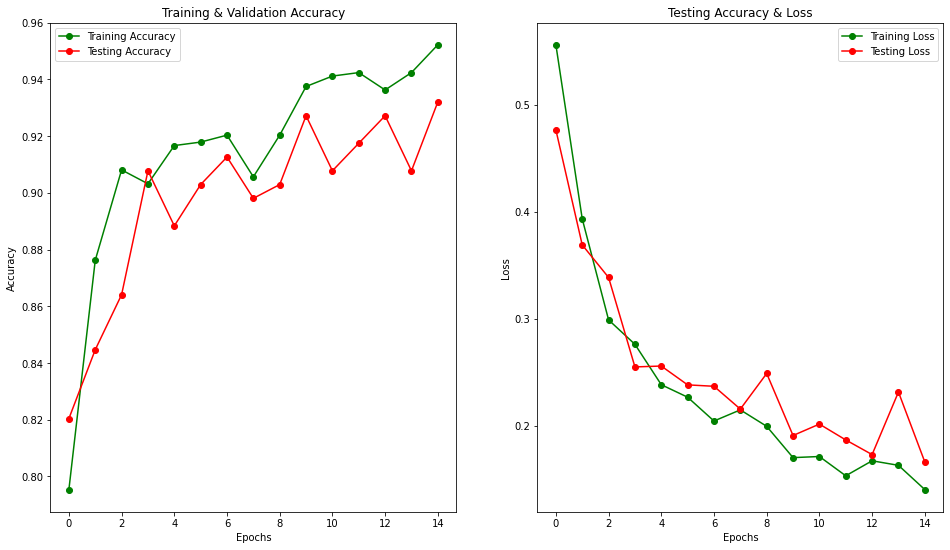

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
model_1.save('/content/drive/MyDrive/ai_healthcare/glaucoma_model_xception_224.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# **Results**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
val_set_eval = val_datagen.flow_from_directory(val_path,
                                          target_size = (512, 512),
                                          batch_size = 8,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 206 images belonging to 2 classes.


In [ ]:
Y_pred = model_1.predict_generator(val_set_eval, len(val_set_eval.classes)//val_set_eval.batch_size +1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
val_set_eval.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print('Confusion Matrix')
cf = confusion_matrix(val_set_eval.classes, y_pred)
print(cf)

Confusion Matrix
[[102   1]
 [  7  96]]


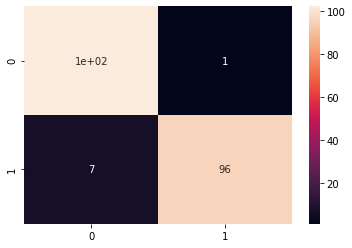

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf,annot=True)
# plt.savefig('model2')

In [ ]:
print('Classification Report')
target_names = ['Glucoma','No_Glucoma']
print(classification_report(val_set_eval.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Glucoma       0.94      0.99      0.96       103
  No_Glucoma       0.99      0.93      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206



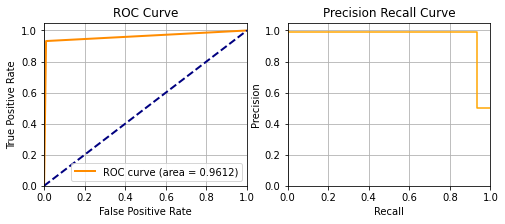

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import norm
from sklearn.metrics import precision_recall_curve

fpr, tpr, _ = roc_curve(val_set_eval.classes, y_pred)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(val_set.classes, y_pred)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)